In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [2]:
dataframe = pd.read_csv('data/spotify-extr.txt', sep=' ')
dataframe.head()

valence  year  acousticness  danceability  duration  energy  \
161704    0.647  1975        0.4490         0.376    298840   0.827   
168077    0.150  2008        0.8990         0.508    236800   0.169   
35922     0.423  2007        0.0185         0.470    301093   0.878   
135823    0.302  1995        0.0384         0.176    142200   0.980   
165395    0.828  1994        0.5310         0.705    187800   0.625   

        instrumentalness key  liveness  loudness  mode  popularity  \
161704          0.007880   B     0.466    -7.604     1          25   
168077          0.000011  Ab     0.136   -11.332     1          42   
35922           0.083900   B     0.276    -5.576     0          65   
135823          0.552000   B     0.237    -3.154     1          36   
165395          0.000008   G     0.348   -11.963     0          38   

        speechiness    tempo pop.class  
161704       0.3990  170.475         C  
168077       0.0553  107.477         B  
35922        0.0377  150.093         A  
135823       0.0721  172.566         C  
165395       0.0639   97.831         C

In [3]:
dataframe.describe()

valence          year  acousticness  danceability      duration  \
count  10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean       0.532815   1977.026200      0.495719      0.540029  2.272151e+05   
std        0.262431     26.000068      0.377681      0.176193  1.124568e+05   
min        0.000000   1921.000000      0.000000      0.000000  5.991000e+03   
25%        0.324000   1956.000000      0.092675      0.417000  1.690670e+05   
50%        0.543000   1978.000000      0.504000      0.550000  2.065295e+05   
75%        0.751000   1999.000000      0.889250      0.671000  2.597330e+05   
max        0.993000   2020.000000      0.996000      0.988000  2.703227e+06   

             energy  instrumentalness      liveness      loudness  \
count  10000.000000      10000.000000  10000.000000  10000.000000   
mean       0.487500          0.164947      0.204063    -11.437683   
std        0.267729          0.313327      0.173221      5.787993   
min        0.000000          0.000000      0.000000    -60.000000   
25%        0.262000          0.000000      0.097800    -14.557000   
50%        0.476000          0.000174      0.135000    -10.552500   
75%        0.708000          0.087100      0.256000     -7.115500   
max        1.000000          1.000000      0.991000      1.342000   

              mode    popularity   speechiness         tempo  
count  10000.00000  10000.000000  10000.000000  10000.000000  
mean       0.71470     31.558100      0.101815    116.865750  
std        0.45158     21.915904      0.168111     30.969039  
min        0.00000      0.000000      0.000000      0.000000  
25%        0.00000     11.000000      0.035000     93.564500  
50%        1.00000     33.000000      0.045400    114.437500  
75%        1.00000     48.250000      0.078600    135.470000  
max        1.00000     93.000000      0.969000    214.419000

In [4]:
print(dataframe.keys())

Index(['valence', 'year', 'acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'pop.class'],
      dtype='object')


In [5]:
pd.isnull(dataframe).sum()

valence             0
year                0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
pop.class           0
dtype: int64

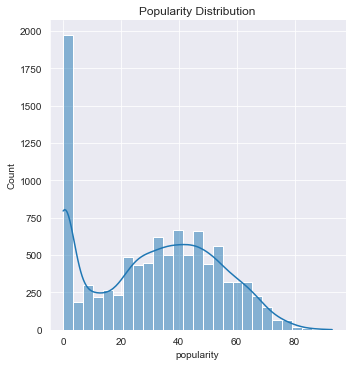

In [6]:
sns.displot(dataframe['popularity'], kde=True)
plt.title('Popularity Distribution')
plt.show()

In [7]:
dataframe.corr()

valence      year  acousticness  danceability  duration  \
valence           1.000000 -0.023340     -0.181083      0.555041 -0.191517   
year             -0.023340  1.000000     -0.616553      0.179617  0.111818   
acousticness     -0.181083 -0.616553      1.000000     -0.263299 -0.111250   
danceability      0.555041  0.179617     -0.263299      1.000000 -0.126671   
duration         -0.191517  0.111818     -0.111250     -0.126671  1.000000   
energy            0.342157  0.538514     -0.748026      0.203770  0.071089   
instrumentalness -0.198932 -0.280544      0.329291     -0.275780  0.072081   
liveness         -0.004654 -0.057493     -0.005874     -0.110652  0.017510   
loudness          0.310310  0.493609     -0.558335      0.268976  0.025394   
mode              0.003955 -0.028307      0.061363     -0.060246 -0.045738   
popularity        0.020718  0.858713     -0.575481      0.189825  0.094376   
speechiness       0.036828 -0.174748     -0.050379      0.232992 -0.093039   
tempo             0.173929  0.144061     -0.219269     -0.006666 -0.012644   

                    energy  instrumentalness  liveness  loudness      mode  \
valence           0.342157         -0.198932 -0.004654  0.310310  0.003955   
year              0.538514         -0.280544 -0.057493  0.493609 -0.028307   
acousticness     -0.748026          0.329291 -0.005874 -0.558335  0.061363   
danceability      0.203770         -0.275780 -0.110652  0.268976 -0.060246   
duration          0.071089          0.072081  0.017510  0.025394 -0.045738   
energy            1.000000         -0.283470  0.110493  0.780850 -0.043038   
instrumentalness -0.283470          1.000000 -0.049330 -0.409723 -0.032316   
liveness          0.110493         -0.049330  1.000000  0.044706 -0.003319   
loudness          0.780850         -0.409723  0.044706  1.000000 -0.011823   
mode             -0.043038         -0.032316 -0.003319 -0.011823  1.000000   
popularity        0.496238         -0.301669 -0.072990  0.463429 -0.027282   
speechiness      -0.071797         -0.124284  0.155242 -0.149928 -0.054013   
tempo             0.265279         -0.115439  0.001253  0.226768  0.022999   

                  popularity  speechiness     tempo  
valence             0.020718     0.036828  0.173929  
year                0.858713    -0.174748  0.144061  
acousticness       -0.575481    -0.050379 -0.219269  
danceability        0.189825     0.232992 -0.006666  
duration            0.094376    -0.093039 -0.012644  
energy              0.496238    -0.071797  0.265279  
instrumentalness   -0.301669    -0.124284 -0.115439  
liveness           -0.072990     0.155242  0.001253  
loudness            0.463429    -0.149928  0.226768  
mode               -0.027282    -0.054013  0.022999  
popularity          1.000000    -0.181803  0.137564  
speechiness        -0.181803     1.000000 -0.010583  
tempo               0.137564    -0.010583  1.000000

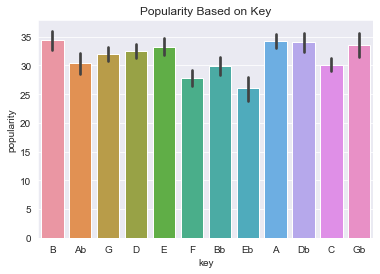

In [8]:
sns.barplot(x='key', y='popularity', data=dataframe)
plt.title('Popularity Based on Key')
plt.show()

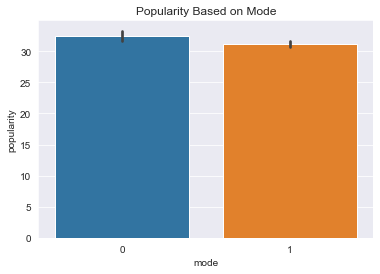

In [9]:
sns.barplot(x='mode', y='popularity', data=dataframe)
plt.title('Popularity Based on Mode')
plt.show()

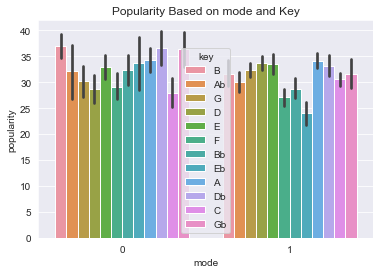

In [10]:
sns.barplot(x='mode', y='popularity', hue='key', data=dataframe)
plt.title('Popularity Based on mode and Key')
plt.show()

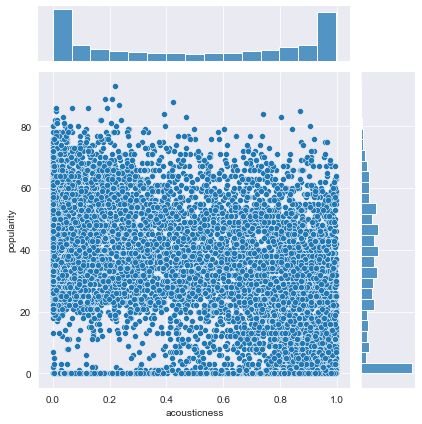

In [11]:
sns.jointplot(x='acousticness', y='popularity', data=dataframe)
plt.show()

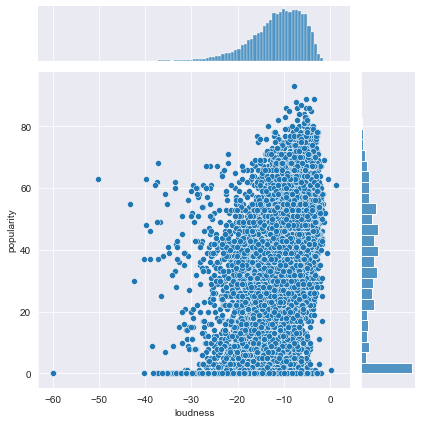

In [12]:
sns.jointplot(x='loudness', y='popularity', data=dataframe)
plt.show()

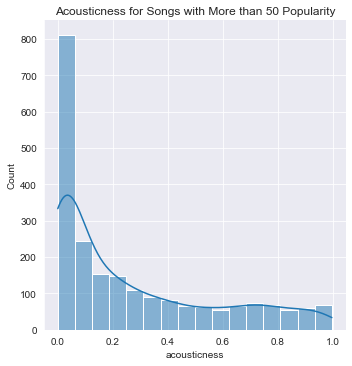

In [13]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.displot(popular_above_50['acousticness'], kde=True)
plt.title('Acousticness for Songs with More than 50 Popularity')
plt.show()

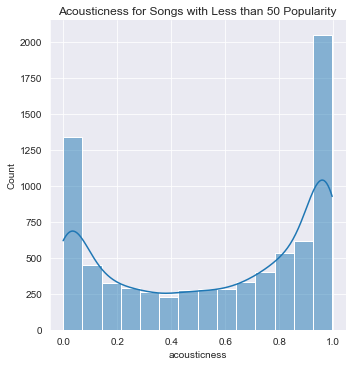

In [14]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.displot(popular_below_50['acousticness'], kde=True)
plt.title('Acousticness for Songs with Less than 50 Popularity')
plt.show()

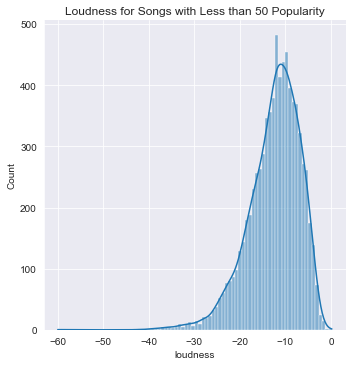

In [15]:
sns.displot(popular_below_50['loudness'], kde=True)
plt.title('Loudness for Songs with Less than 50 Popularity')
plt.show()

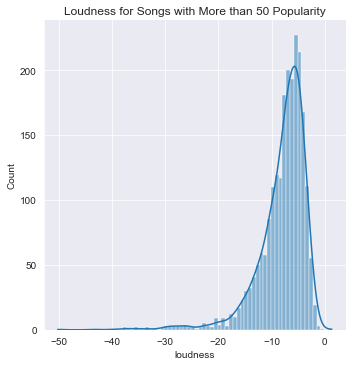

In [16]:
sns.displot(popular_above_50['loudness'], kde=True)
plt.title('Loudness for Songs with More than 50 Popularity')
plt.show()

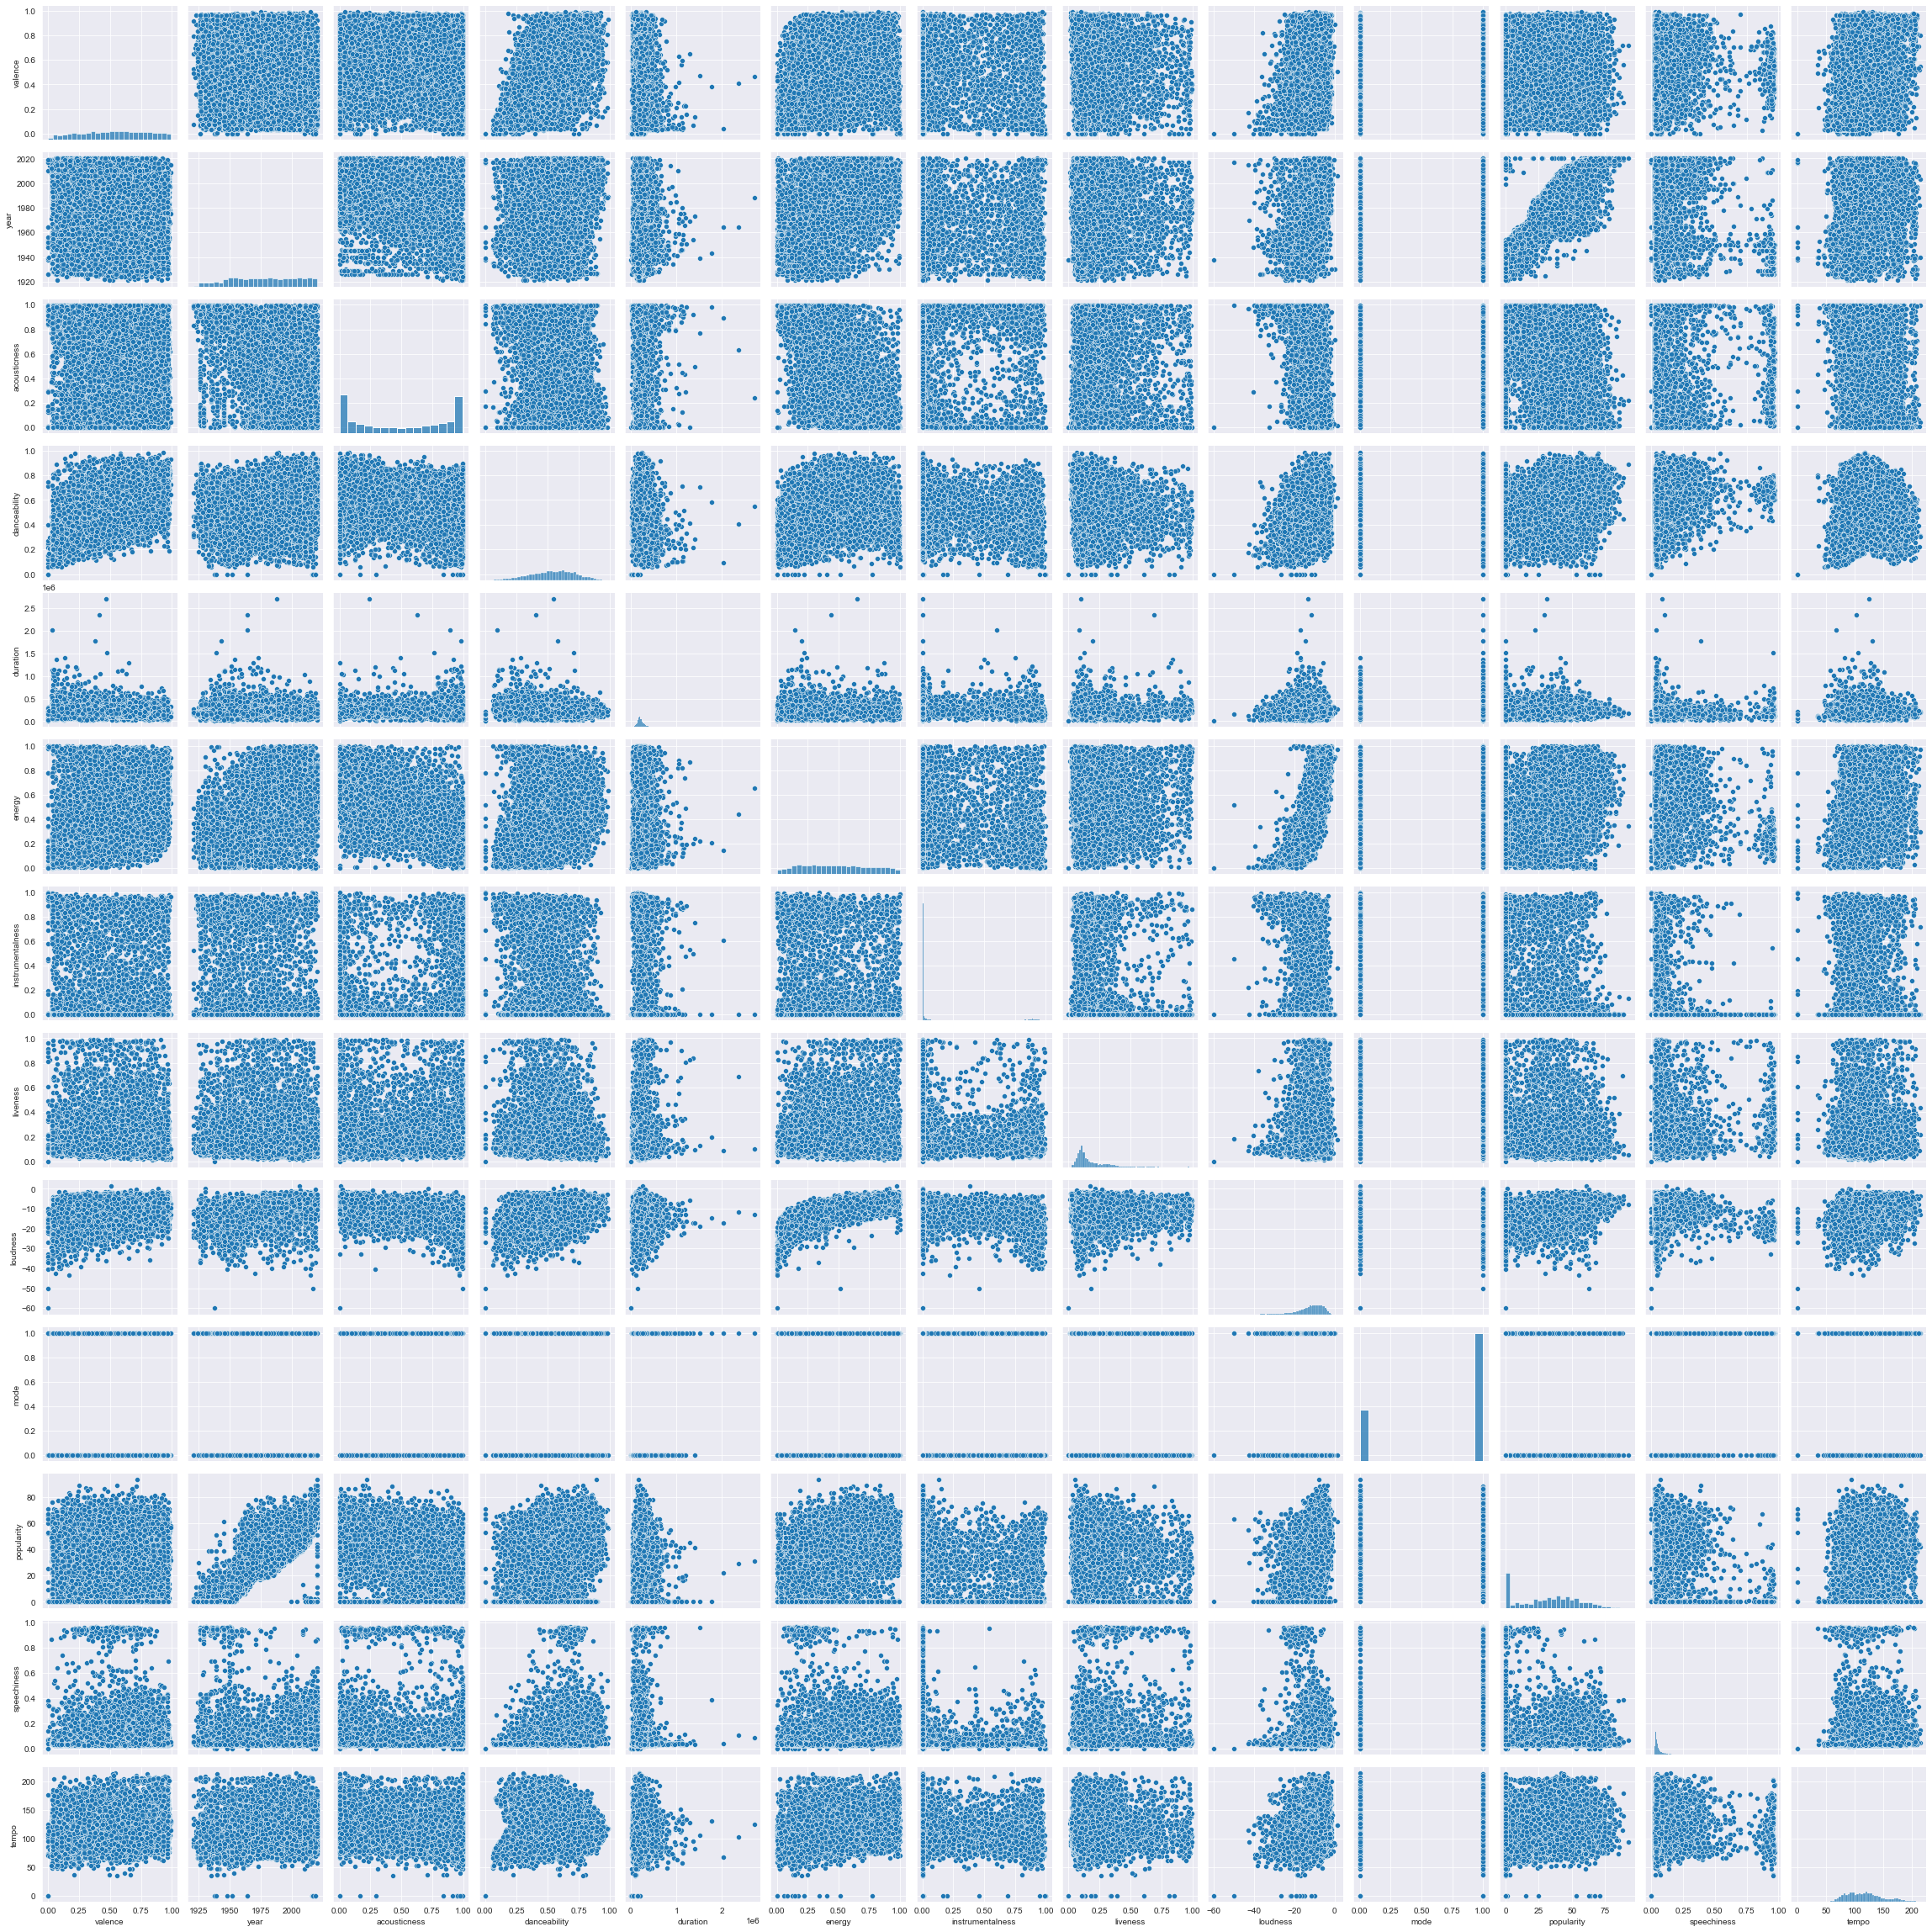

In [17]:
sns.pairplot(dataframe)
plt.show()

In [18]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

valence  year  acousticness  danceability  duration  energy  \
743       0.744  1925        0.9420         0.711    174427   0.635   
97665     0.887  1964        0.7330         0.600    135000   0.502   
105946    0.503  2006        0.0762         0.541    307933   0.828   
19680     0.322  2020        0.8680         0.708    156106   0.186   
167743    0.562  2006        0.0591         0.380    202200   0.558   

        instrumentalness key  liveness  loudness  mode  popularity  \
743             0.882000  10    0.0744    -5.458     1           0   
97665           0.000013   3    0.2150    -8.580     0          20   
105946          0.000031   3    0.3180    -4.048     1          44   
19680           0.000000   8    0.0779    -8.953     0          85   
167743          0.030200   3    0.0702    -6.517     1          54   

        speechiness    tempo pop.class  
743          0.0479  104.181         D  
97665        0.0443  153.675         D  
105946       0.0417   95.011         B  
19680        0.0420   72.541         A  
167743       0.0279   81.524         B

In [19]:
dataframe.loc[dataframe['popularity'] < 60, 'popularity'] = 0
dataframe.loc[dataframe['popularity'] >= 60, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

valence  year  acousticness  danceability  duration  energy  \
35922     0.423  2007      0.018500         0.470    301093   0.878   
38184     0.489  2018      0.371000         0.856    324189   0.694   
11675     0.411  1980      0.360000         0.602    312773   0.732   
73898     0.516  2014      0.000926         0.855    270054   0.856   
57293     0.533  2020      0.171000         0.732    414820   0.634   
...         ...   ...           ...           ...       ...     ...   
11741     0.932  1980      0.004410         0.559    213693   0.764   
14823     0.479  1996      0.563000         0.856    185360   0.517   
155084    0.237  2018      0.649000         0.801    197914   0.650   
124778    0.795  2020      0.054900         0.772    179080   0.925   
91205     0.109  2015      0.269000         0.287    295093   0.430   

        instrumentalness key  liveness  loudness  mode  popularity  \
35922           0.083900   0    0.2760    -5.576     0           1   
38184           0.000000   3    0.1090    -4.393     1           1   
11675           0.000314   3    0.0755    -8.290     1           1   
73898           0.002710   8    0.9590    -2.574     0           1   
57293           0.000000   9    0.2040    -5.587     1           1   
...                  ...  ..       ...       ...   ...         ...   
11741           0.029900   3    0.0807    -7.058     0           1   
14823           0.000164  11    0.1440    -9.232     0           1   
155084          0.000000  10    0.1090    -7.855     1           1   
124778          0.000000   8    0.2010    -2.788     0           1   
91205           0.000579   5    0.3200   -10.014     0           1   

        speechiness    tempo pop.class  
35922        0.0377  150.093         A  
38184        0.1690  122.080         A  
11675        0.0282  129.355         A  
73898        0.1050  127.989         A  
57293        0.3600  173.886         A  
...             ...      ...       ...  
11741        0.0348  143.319         A  
14823        0.0293  118.399         A  
155084       0.0576  119.993         A  
124778       0.1080  119.963         A  
91205        0.0330   93.984         A  

[1081 rows x 15 columns]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [21]:
features = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'key',
            'liveness', 'mode', 'speechiness', 'tempo', 'valence']

In [22]:
training = dataframe.sample(frac=2/3, random_state=42)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [43]:
def model_accurarcy_ranking(X_train, X_valid, y_train, y_valid, threshold):
    import time
    print("Transforming the popularity variable into a binary one...", end=" ")
    dataframe.loc[dataframe['popularity'] < threshold, 'popularity'] = 0
    dataframe.loc[dataframe['popularity'] >= threshold, 'popularity'] = 1
    dataframe.loc[dataframe['popularity'] == 1]
    print("Done!")
    time.sleep(3)
    print("Importing all necessary modules...", end=" ")
    from IPython.display import clear_output
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC, LinearSVC
    from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split
    
    print("Done!")
    time.sleep(3)
    step_explain = ["Computing logistic regression...",
                    "Computing Random Forest Classifier...",
                    "Computing K-Nearest Neighbors Classifier...",
                    "Computing Decision Tree Classifier",
                    "Computing Support Vector Classification"]
    
    model_functions = [LogisticRegression(),
                       RandomForestClassifier(),
                       KNeighborsClassifier(),
                       DecisionTreeClassifier(),
                       LinearSVC(max_iter = 2000)]
    model_accuracy_score = []
    model_AUC = []
    number_of_steps = len(step_explain)
    
    for i in range(number_of_steps): 
        print(step_explain[i], end=" ")
        model = model_functions[i]
        model.fit(X_train, y_train)
        model_predict = model.predict(X_valid)
        accuracy = accuracy_score(y_valid, model_predict)
        model_accuracy_score.append(accuracy)
        AUC = roc_auc_score(y_valid, model_predict)
        model_AUC.append(AUC)
        print("Done!")
        time.sleep(3)
    clear_output(wait=False)

    model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'Accuracy': model_accuracy_score})

    model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'AUC': model_AUC})
    accuracy = model_performance_accuracy.sort_values(by='Accuracy', ascending=False)
    auc = model_performance_AUC.sort_values(by='AUC', ascending=False)
    return accuracy, auc

In [44]:
accuracy, auc = model_accurarcy_ranking(X_train, X_valid, y_train, y_valid, threshold = 60)

In [41]:
accuracy.head()

Model  Accuracy
1  RandomForestClassifier  0.891304
0      LogisticRegression  0.887556
4               LinearSVC  0.887556
2    KNeighborsClassifier  0.880060
3  DecisionTreeClassifier  0.817091

In [42]:
auc.head()

Model       AUC
3  DecisionTreeClassifier  0.550546
1  RandomForestClassifier  0.539955
2    KNeighborsClassifier  0.507421
0      LogisticRegression  0.500000
4               LinearSVC  0.500000

## Random Forest Classifier

In [28]:
# RFC_Model = RandomForestClassifier()
# RFC_Model.fit(X_train, y_train)
# RFC_Predict = RFC_Model.predict(X_valid)
# RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
# print("Accuracy: " + str(RFC_Accuracy))

# RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
# print("AUC: " + str(RFC_AUC))